# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [7]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)



1회차 실습 과제: 통계적 사고와 기술통계


In [8]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()


<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [9]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()


VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경

차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업

1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산

2. 10%, 20% 절사평균 계산 및 산술평균과 비교

3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)

4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교

5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [10]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
emissions = df['EMISSIONS']

mean_val = emissions.mean()
median_val = emissions.median()
mode_val = emissions.mode()[0]

print("[1] 기본 대표값")
print(f"  산술평균: {mean_val:.2f} g/km")
print(f"  중앙값:   {median_val:.2f} g/km")
print(f"  최빈값:   {mode_val:.2f} g/km")
print(f"  → 평균과 중앙값 차이: {mean_val - median_val:+.2f} (양수면 오른쪽 꼬리)")

# TODO 2: 절사평균 계산
trimmed_10 = stats.trim_mean(emissions, 0.1)
trimmed_20 = stats.trim_mean(emissions, 0.2)

print(f"\n[2] 절사평균")
print(f"  10% 절사평균: {trimmed_10:.2f} g/km")
print(f"  20% 절사평균: {trimmed_20:.2f} g/km")
print(f"  산술평균({mean_val:.2f})과의 차이: {mean_val - trimmed_10:+.2f} (10%), {mean_val - trimmed_20:+.2f} (20%)")

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
class_filters = {
    'COMPACT': df['VEHICLE CLASS'] == 'COMPACT',
    'MID-SIZE': df['VEHICLE CLASS'] == 'MID-SIZE',
    'SUV': df['VEHICLE CLASS'].str.contains('SUV'),
}
weights_map = {'COMPACT': 0.5, 'MID-SIZE': 0.3, 'SUV': 0.2}

class_means = {}
for cls, mask in class_filters.items():
    class_means[cls] = df.loc[mask, 'EMISSIONS'].mean()

weighted_avg = sum(class_means[c] * weights_map[c] for c in class_means)

print(f"\n[3] 가중평균 (COMPACT 50%, MID-SIZE 30%, SUV 20%)")
for cls in class_means:
    print(f"  {cls} 평균: {class_means[cls]:.2f} g/km (가중치: {weights_map[cls]:.0%})")
print(f"  가중평균: {weighted_avg:.2f} g/km")

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
print(f"\n[4] 차량등급별 평균/중앙값 비교")
print(f"  {'등급':<12} {'평균':>10} {'중앙값':>10} {'차이(평균-중앙값)':>18}")
print(f"  {'-'*52}")
for cls, mask in class_filters.items():
    sub = df.loc[mask, 'EMISSIONS']
    m, md = sub.mean(), sub.median()
    print(f"  {cls:<12} {m:>10.2f} {md:>10.2f} {m - md:>+18.2f}")

# TODO 5: 결과 해석 (print문으로 작성)
print(f"\n[5] 결과 해석")
print(f"  • 산술평균({mean_val:.2f})이 중앙값({median_val:.2f})보다 {'크므로' if mean_val > median_val else '작으므로'} 오른쪽 꼬리(고배출 차량)의 영향이 있습니다.")
print(f"  • 절사평균이 산술평균보다 작아 극단값(고배출 차량)의 영향을 확인할 수 있습니다.")
print(f"  • SUV의 배출량이 가장 높고, COMPACT가 가장 낮습니다.")
print(f"  • 이상치가 있는 경우 절사평균이나 중앙값이 더 적절한 대표값입니다.")


[1] 기본 대표값
  산술평균: 250.07 g/km
  중앙값:   243.00 g/km
  최빈값:   221.00 g/km
  → 평균과 중앙값 차이: +7.07 (양수면 오른쪽 꼬리)

[2] 절사평균
  10% 절사평균: 247.34 g/km
  20% 절사평균: 245.40 g/km
  산술평균(250.07)과의 차이: +2.72 (10%), +4.67 (20%)

[3] 가중평균 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
  COMPACT 평균: 211.54 g/km (가중치: 50%)
  MID-SIZE 평균: 223.70 g/km (가중치: 30%)
  SUV 평균: 263.44 g/km (가중치: 20%)
  가중평균: 225.57 g/km

[4] 차량등급별 평균/중앙값 비교
  등급                   평균        중앙값         차이(평균-중앙값)
  ----------------------------------------------------
  COMPACT          211.54     207.00              +4.54
  MID-SIZE         223.70     221.00              +2.70
  SUV              263.44     258.00              +5.44

[5] 결과 해석
  • 산술평균(250.07)이 중앙값(243.00)보다 크므로 오른쪽 꼬리(고배출 차량)의 영향이 있습니다.
  • 절사평균이 산술평균보다 작아 극단값(고배출 차량)의 영향을 확인할 수 있습니다.
  • SUV의 배출량이 가장 높고, COMPACT가 가장 낮습니다.
  • 이상치가 있는 경우 절사평균이나 중앙값이 더 적절한 대표값입니다.


---

## 📝 실습 문제 2: 산포도 측도

### 배경

**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법

- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과

- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업

1. 두 변수의 분산, 표준편차, 범위, IQR 계산

2. 변동계수(CV) 계산하여 상대적 산포 비교

3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교

4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯

5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교

6. 결과 해석

[1] 산포 측도
  지표              COMB (L/100 km)     ENGINE SIZE
  ------------------------------------------------
  분산                       8.4735          1.7834
  표준편차                     2.9109          1.3354
  범위                      22.5000          7.6000
  IQR                      3.6000          1.9000

[2] 변동계수 (CV = 표준편차 / 평균 × 100)
  COMB (L/100 km): 26.38%
  ENGINE SIZE: 39.78%

[3] 이상치 탐지

  [COMB (L/100 km)]
    IQR 방법: 하한=3.70, 상한=18.10 → 이상치 548개
    Z-score |Z|>2: 1124개, |Z|>3: 219개

  [ENGINE SIZE]
    IQR 방법: 하한=-0.55, 상한=7.05 → 이상치 41개
    Z-score |Z|>2: 762개, |Z|>3: 41개


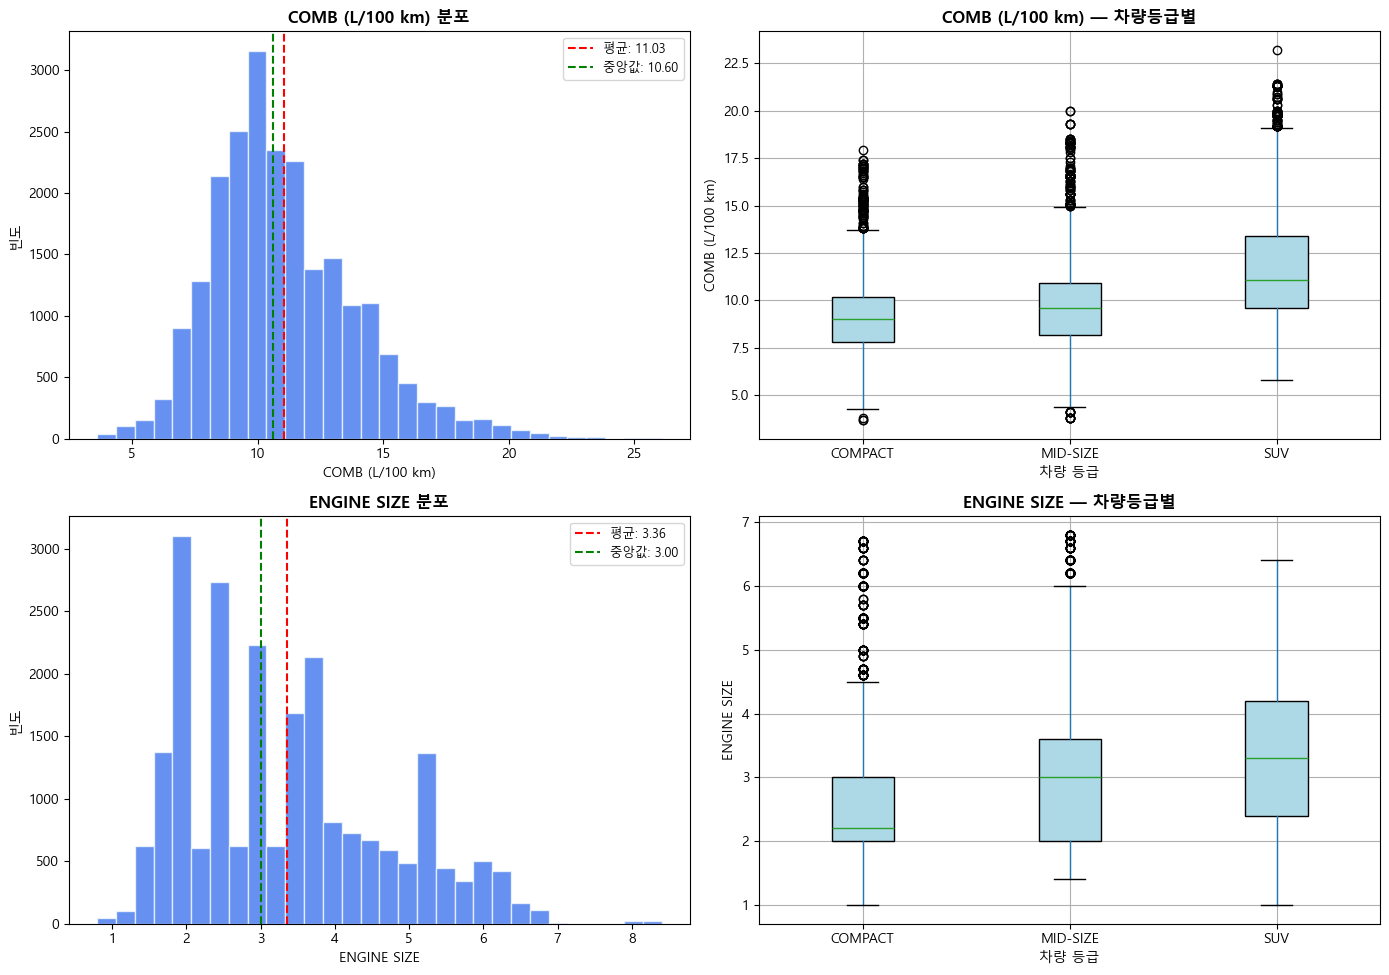


[5] 차량등급별 표준편차 비교
  등급                COMB SD     ENGINE SIZE SD
  --------------------------------------------
  COMPACT            2.0604             1.0786
  MID-SIZE           2.3951             1.1950
  SUV                2.6622             1.2556

[6] 결과 해석
  • 변동계수: COMB=26.4%, ENGINE SIZE=39.8%
  • 상대적 산포는 ENGINE SIZE가 더 큽니다.
  • IQR 방법이 Z-score(|Z|>3)보다 더 많은 이상치를 탐지하는 경향이 있습니다.
  • SUV가 두 변수 모두에서 산포가 큰 경향을 보입니다.


In [11]:
# TODO 1: 두 변수의 산포 측도 계산
variables = {'COMB (L/100 km)': df['COMB (L/100 km)'], 'ENGINE SIZE': df['ENGINE SIZE']}

print("[1] 산포 측도")
print(f"  {'지표':<12} {'COMB (L/100 km)':>18} {'ENGINE SIZE':>15}")
print(f"  {'-'*48}")
for name in ['분산', '표준편차', '범위', 'IQR']:
    vals = []
    for col_data in variables.values():
        if name == '분산':
            vals.append(col_data.var(ddof=1))
        elif name == '표준편차':
            vals.append(col_data.std(ddof=1))
        elif name == '범위':
            vals.append(col_data.max() - col_data.min())
        elif name == 'IQR':
            vals.append(col_data.quantile(0.75) - col_data.quantile(0.25))
    print(f"  {name:<12} {vals[0]:>18.4f} {vals[1]:>15.4f}")

# TODO 2: 변동계수(CV) 계산
print(f"\n[2] 변동계수 (CV = 표준편차 / 평균 × 100)")
for col_name, col_data in variables.items():
    cv = col_data.std(ddof=1) / col_data.mean() * 100
    print(f"  {col_name}: {cv:.2f}%")

# TODO 3: 이상치 탐지 (IQR, Z-score)
print(f"\n[3] 이상치 탐지")
for col_name, col_data in variables.items():
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    iqr_val = Q3 - Q1
    lower = Q1 - 1.5 * iqr_val
    upper = Q3 + 1.5 * iqr_val
    iqr_outliers = col_data[(col_data < lower) | (col_data > upper)]

    z_scores = np.abs(stats.zscore(col_data))
    z_outliers_2 = col_data[z_scores > 2]
    z_outliers_3 = col_data[z_scores > 3]

    print(f"\n  [{col_name}]")
    print(f"    IQR 방법: 하한={lower:.2f}, 상한={upper:.2f} → 이상치 {len(iqr_outliers)}개")
    print(f"    Z-score |Z|>2: {len(z_outliers_2)}개, |Z|>3: {len(z_outliers_3)}개")

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
df_viz = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE']) | df['VEHICLE CLASS'].str.contains('SUV')].copy()
df_viz['CLASS_GROUP'] = df_viz['VEHICLE CLASS'].apply(lambda x: 'SUV' if 'SUV' in x else x)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, (col_name, col_data) in enumerate(variables.items()):
    axes[i, 0].hist(col_data, bins=30, edgecolor='white', alpha=0.7, color='#2563EB')
    axes[i, 0].axvline(col_data.mean(), color='red', linestyle='--', label=f'평균: {col_data.mean():.2f}')
    axes[i, 0].axvline(col_data.median(), color='green', linestyle='--', label=f'중앙값: {col_data.median():.2f}')
    axes[i, 0].set_title(f'{col_name} 분포', fontweight='bold')
    axes[i, 0].set_xlabel(col_name)
    axes[i, 0].set_ylabel('빈도')
    axes[i, 0].legend(fontsize=9)

    df_viz.boxplot(column=col_name, by='CLASS_GROUP', ax=axes[i, 1],
                   patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i, 1].set_title(f'{col_name} — 차량등급별', fontweight='bold')
    axes[i, 1].set_xlabel('차량 등급')
    axes[i, 1].set_ylabel(col_name)
plt.suptitle('')
plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
print(f"\n[5] 차량등급별 표준편차 비교")
print(f"  {'등급':<12} {'COMB SD':>12} {'ENGINE SIZE SD':>18}")
print(f"  {'-'*44}")
for cls, mask in class_filters.items():
    sd_comb = df.loc[mask, 'COMB (L/100 km)'].std(ddof=1)
    sd_eng = df.loc[mask, 'ENGINE SIZE'].std(ddof=1)
    print(f"  {cls:<12} {sd_comb:>12.4f} {sd_eng:>18.4f}")

# TODO 6: 결과 해석
cv_comb = df['COMB (L/100 km)'].std(ddof=1) / df['COMB (L/100 km)'].mean() * 100
cv_eng = df['ENGINE SIZE'].std(ddof=1) / df['ENGINE SIZE'].mean() * 100
print(f"\n[6] 결과 해석")
print(f"  • 변동계수: COMB={cv_comb:.1f}%, ENGINE SIZE={cv_eng:.1f}%")
more_dispersed = 'COMB (L/100 km)' if cv_comb > cv_eng else 'ENGINE SIZE'
print(f"  • 상대적 산포는 {more_dispersed}가 더 큽니다.")
print(f"  • IQR 방법이 Z-score(|Z|>3)보다 더 많은 이상치를 탐지하는 경향이 있습니다.")
print(f"  • SUV가 두 변수 모두에서 산포가 큰 경향을 보입니다.")


---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경

4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**

| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |

**초과 첨도**

| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업

1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS

2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)

3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)

     - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시

4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교

5. 결과 해석

[2] 분포 형태 요약
                       왜도        첨도           왜도 해석        첨도 해석
ENGINE SIZE      0.631264 -0.394947  오른쪽 꼬리 (양의 왜도)     정규분포와 유사
COMB (L/100 km)  0.817065  1.054642  오른쪽 꼬리 (양의 왜도)  꼬리 두꺼움 (뾰족)
COMB (mpg)       1.172800  3.643618  오른쪽 꼬리 (양의 왜도)  꼬리 두꺼움 (뾰족)
EMISSIONS        0.534641  0.615430  오른쪽 꼬리 (양의 왜도)  꼬리 두꺼움 (뾰족)


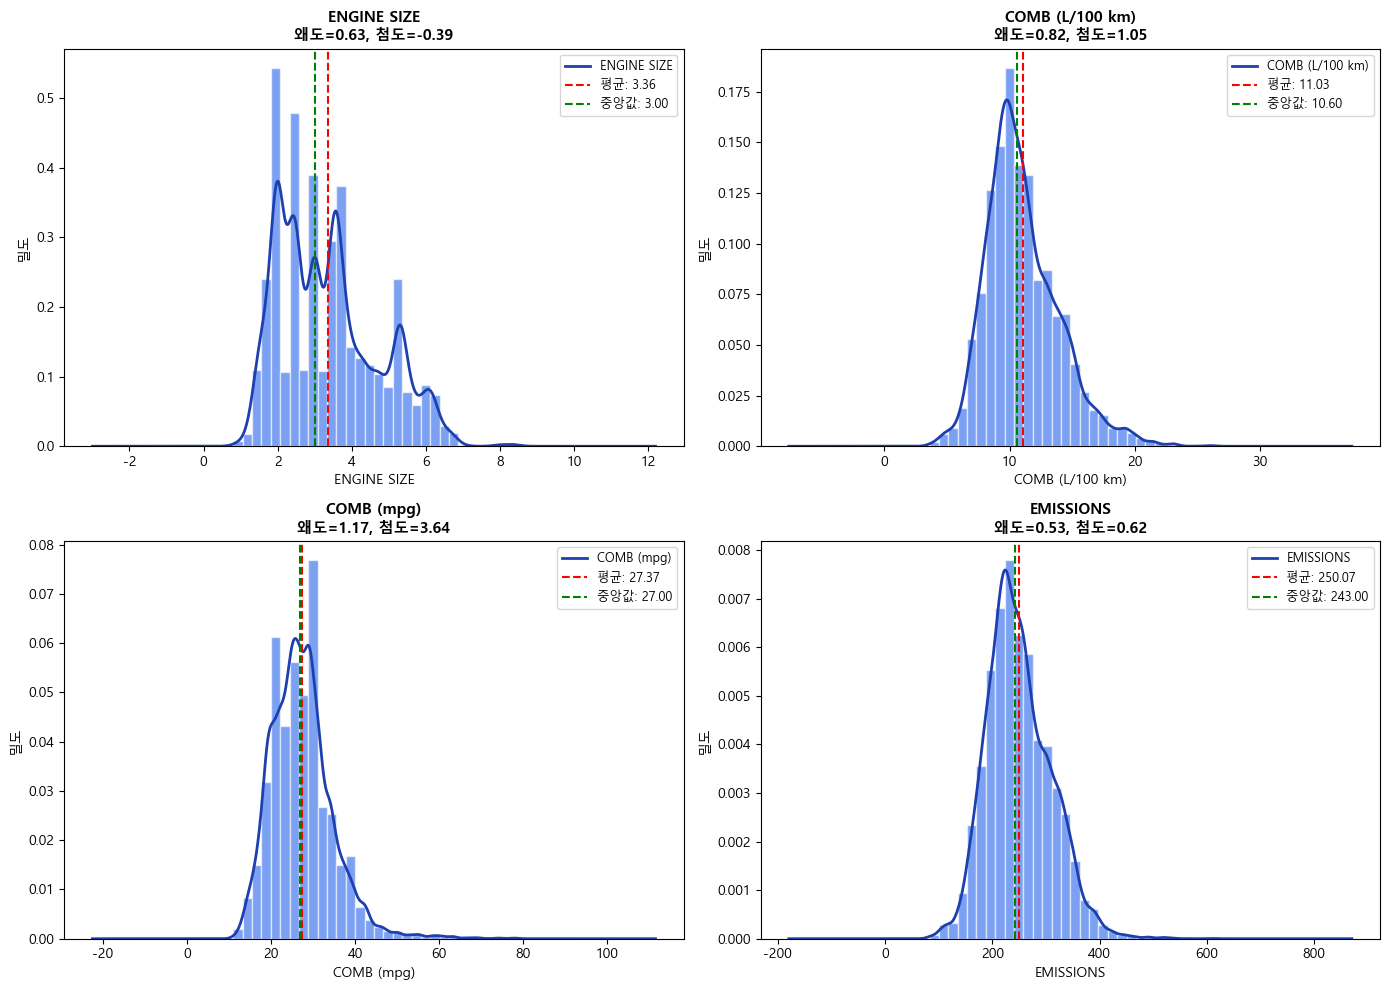


[4] 연료타입별 EMISSIONS 분포 형태
              평균    표본수        왜도        첨도
FUEL                                       
N     312.848485     33 -1.851785  3.071255
E     270.578898   1071 -0.189320 -0.256257
Z     260.574818   9316  0.997177  1.607523
X     240.280748  11822  0.330538 -0.292857
D     230.305732    314 -0.367713 -1.042831

[5] 결과 해석
  • ENGINE SIZE: 왜도=0.63 (오른쪽 꼬리 (양의 왜도)), 첨도=-0.39 (정규분포와 유사)
  • COMB (L/100 km): 왜도=0.82 (오른쪽 꼬리 (양의 왜도)), 첨도=1.05 (꼬리 두꺼움 (뾰족))
  • COMB (mpg): 왜도=1.17 (오른쪽 꼬리 (양의 왜도)), 첨도=3.64 (꼬리 두꺼움 (뾰족))
  • EMISSIONS: 왜도=0.53 (오른쪽 꼬리 (양의 왜도)), 첨도=0.62 (꼬리 두꺼움 (뾰족))
  • 왜도가 양수인 변수는 고배출/대배기량 차량이 분포의 꼬리를 늘리는 것입니다.
  • 연료타입에 따라 EMISSIONS 분포의 형태가 크게 다릅니다.


In [12]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
results = {}
for col in numeric_cols:
    results[col] = {'왜도': df[col].skew(), '첨도': df[col].kurtosis()}

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
def interpret_skew(s):
    if abs(s) < 0.5:
        return '대략 대칭'
    return '오른쪽 꼬리 (양의 왜도)' if s > 0 else '왼쪽 꼬리 (음의 왜도)'

def interpret_kurt(k):
    if abs(k) < 0.5:
        return '정규분포와 유사'
    return '꼬리 두꺼움 (뾰족)' if k > 0 else '꼬리 얇음 (완만)'

shape_df = pd.DataFrame(results).T
shape_df.columns = ['왜도', '첨도']
shape_df['왜도 해석'] = shape_df['왜도'].apply(interpret_skew)
shape_df['첨도 해석'] = shape_df['첨도'].apply(interpret_kurt)

print("[2] 분포 형태 요약")
print(shape_df.to_string())

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    ax = axes[i // 2, i % 2]
    data = df[col].dropna()
    ax.hist(data, bins=30, density=True, alpha=0.6, edgecolor='white', color='#2563EB')
    data.plot.kde(ax=ax, color='#1E40AF', linewidth=2)
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=1.5, label=f'평균: {data.mean():.2f}')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=1.5, label=f'중앙값: {data.median():.2f}')
    skew_val = data.skew()
    kurt_val = data.kurtosis()
    ax.set_title(f'{col}\n왜도={skew_val:.2f}, 첨도={kurt_val:.2f}', fontweight='bold', fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel('밀도')
    ax.legend(fontsize=9)
plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
print(f"\n[4] 연료타입별 EMISSIONS 분포 형태")
fuel_stats = df.groupby('FUEL')['EMISSIONS'].agg(
    평균='mean', 표본수='count', 왜도='skew',
    첨도=lambda x: x.kurtosis()
).sort_values('평균', ascending=False)
print(fuel_stats.to_string())

# TODO 5: 결과 해석
print(f"\n[5] 결과 해석")
for col in numeric_cols:
    s, k = df[col].skew(), df[col].kurtosis()
    print(f"  • {col}: 왜도={s:.2f} ({interpret_skew(s)}), 첨도={k:.2f} ({interpret_kurt(k)})")
print(f"  • 왜도가 양수인 변수는 고배출/대배기량 차량이 분포의 꼬리를 늘리는 것입니다.")
print(f"  • 연료타입에 따라 EMISSIONS 분포의 형태가 크게 다릅니다.")


---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙

- `math.sqrt`만 사용 가능

- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [13]:
import math


def my_mean(data):
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    return sum(data) / len(data)


def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    sorted_data = sorted(data)
    n = len(sorted_data)
    trim_count = int(n * proportion)
    trimmed = sorted_data[trim_count:n - trim_count] if trim_count > 0 else sorted_data
    return sum(trimmed) / len(trimmed)


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    total_weight = sum(weights)
    return sum(d * w for d, w in zip(data, weights)) / total_weight


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return float(sorted_data[mid])


def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    counts = {}
    max_count = 0
    mode_val = data[0]
    for x in data:
        counts[x] = counts.get(x, 0) + 1
        if counts[x] > max_count:
            max_count = counts[x]
            mode_val = x
    return mode_val


def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    mean = my_mean(data)
    n = len(data)
    return sum((x - mean) ** 2 for x in data) / (n - ddof)


def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    return math.sqrt(my_variance(data, ddof))


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    sorted_data = sorted(data)
    n = len(sorted_data)
    idx = round((n - 1) * q / 100)
    return sorted_data[idx]


def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    return my_percentile(data, 75) - my_percentile(data, 25)

In [14]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")





검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
